# Import Statements

In [16]:
import OCR_pipeline as OCR
import TopicModeling as TM
import jsonpickle

# Cleaning And Saving Extracted Text

In [17]:
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  passwd="seagull12",
  database="forestry"
)
mycursor = mydb.cursor()

def getExtractedTexts():
    mycursor.execute("SELECT filename, extractedText FROM PolicyPapers")
    myresult = mycursor.fetchall()
    return [x for x in myresult]

def getExtractedTextsFromCountries(countries):
    sqlStatement = "SELECT filename, extractedText FROM PolicyPapers WHERE"
    
    for i in range(len(countries)):
        whereClause = " country = '%s' " % countries[i]
        sqlStatement += whereClause
        if len(countries) != 1 and i < len(countries) - 1:
            sqlStatement += "or"
            
    mycursor.execute(sqlStatement)
    myresult = mycursor.fetchall()
    return [x for x in myresult]

In [18]:
#dictionary for texts in terms of sentences
import re
import gc
textDictionary = {}
countries = ['India']
policyPapers = getExtractedTextsFromCountries(countries)
for paper in policyPapers:
    cleanWhitespaces = re.sub(r'(.) ', r'\1', paper[1])
    cleanedText = TM.toSentences(cleanWhitespaces)
    textDictionary[paper[0]] = cleanedText
   # gc.collect()

# LDA

In [30]:
from pprint import pprint
# from gensim.models.doc2vec import Doc2Vec, LabeledSentence
# import warnings
# warnings.filterwarnings('ignore')
lemmatized_sents = []

# Print the Keywords in the 5 topics
for key in textDictionary:
    cleanedText = textDictionary[key]
    lemmatized_sents.extend(cleanedText)
    
corpus, lda_model = TM.LDA(lemmatized_sents)
#lda_model.doc2vec.LabeledSentence(words=remove_stopwords([u'be']))
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]
#Next Step: Store LDA data in Policy Paper Object & other central file

AttributeError: 'LdaModel' object has no attribute 'doc2vec'

# Visualizations

### pyLDAvis

`pip install pyldavis`

Code source: https://markroxor.github.io/gensim/static/notebooks/gensim_news_classification.html
<br>
The area of the circles represent the prevalance of the topic. The length of the bars on the right represent the membership of a term in a particular topic. 

In [20]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)

/Users/kimberly/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
19    -0.290731  0.051095       1        1  10.403260
3     -0.226910  0.040694       2        1   8.999857
2      0.013834  0.069859       3        1   5.812509
29    -0.236809  0.025962       4        1   5.514057
6     -0.188490  0.009965       5        1   5.458594
14     0.214044  0.124024       6        1   5.290286
25    -0.228852  0.009280       7        1   5.167958
26     0.156785  0.225869       8        1   5.036545
27     0.060358  0.180143       9        1   4.330265
5      0.124719  0.209555      10        1   4.168670
4     -0.171291  0.090690      11        1   3.420515
28     0.050611  0.062607      12        1   2.931673
7     -0.077023 -0.016593      13        1   2.868685
10    -0.057733  0.053140      14        1   2.637746
17     0.092949  0.098554      15        1   2.493556
15     0.067006 -0.127543      16        1   2.312580
18     0.033262 -0.161433      17        1   2.276087
9     -0.051044  0.057564      18        1   2.196261
23    -0.105563 -0.130377      19        1   1.922684
16     0.066759 -0.038809      20        1   1.755593
13     0.163793 -0.055586      21        1   1.735078
0     -0.000033 -0.081564      22        1   1.711776
21     0.023629 -0.060522      23        1   1.653270
24     0.052098 -0.106001      24        1   1.615457
1      0.120234 -0.047182      25        1   1.582508
12     0.105578 -0.031668      26        1   1.533960
20     0.129232 -0.097789      27        1   1.474854
22     0.045283 -0.107496      28        1   1.402792
11     0.020095 -0.145371      29        1   1.265843
8      0.094209 -0.101066      30        1   1.027080, topic_info=     Category         Freq           Term        Total  loglift  logprob
term                                                                    
676   Default  1764.000000         forest  1764.000000  30.0000  30.0000
330   Default   944.000000         change   944.000000  29.0000  29.0000
7341  Default  1045.000000        climate  1045.000000  28.0000  28.0000
333   Default  1586.000000     government  1586.000000  27.0000  27.0000
6     Default  7294.000000             be  7294.000000  26.0000  26.0000
4097  Default   742.000000      committee   742.000000  25.0000  25.0000
340   Default  2079.000000          state  2079.000000  24.0000  24.0000
188   Default   889.000000        section   889.000000  23.0000  23.0000
19    Default  2550.000000          shall  2550.000000  22.0000  22.0000
1745  Default   629.000000        pradesh   629.000000  21.0000  21.0000
131   Default   488.000000           mine   488.000000  20.0000  20.0000
299   Default   694.000000           land   694.000000  19.0000  19.0000
20    Default   877.000000            act   877.000000  18.0000  18.0000
5     Default   969.000000           rule   969.000000  17.0000  17.0000
305   Default   915.000000          water   915.000000  16.0000  16.0000
197   Default  2033.000000           such  2033.000000  15.0000  15.0000
937   Default   348.000000       capacity   348.000000  14.0000  14.0000
132   Default   554.000000         mining   554.000000  13.0000  13.0000
9     Default  1571.000000            may  1571.000000  12.0000  12.0000
355   Default   429.000000         lessee   429.000000  11.0000  11.0000
1226  Default   336.000000         sector   336.000000  10.0000  10.0000
135   Default   908.000000            not   908.000000   9.0000   9.0000
152   Default   623.000000           plan   623.000000   8.0000   8.0000
26    Default   362.000000         energy   362.000000   7.0000   7.0000
2279  Default   477.000000           high   477.000000   6.0000   6.0000
45    Default  1053.000000           area  1053.000000   5.0000   5.0000
1605  Default   302.000000         animal   302.000000   4.0000   4.0000
50    Default   632.000000      authority   632.000000   3.0000   3.0000
1151  Default   331.000000         acti

### WordCloud

`pip install wordcloud`

Code source: https://medium.com/@rudyb2001/making-sense-of-the-news-using-machine-learning-e13ed5f96cf0
<br>
WordCloud of Top 10 words in each topic with the sizes of the words proportional to the weights.

In [23]:
len(lda_model.show_topics(formatted=False))

10

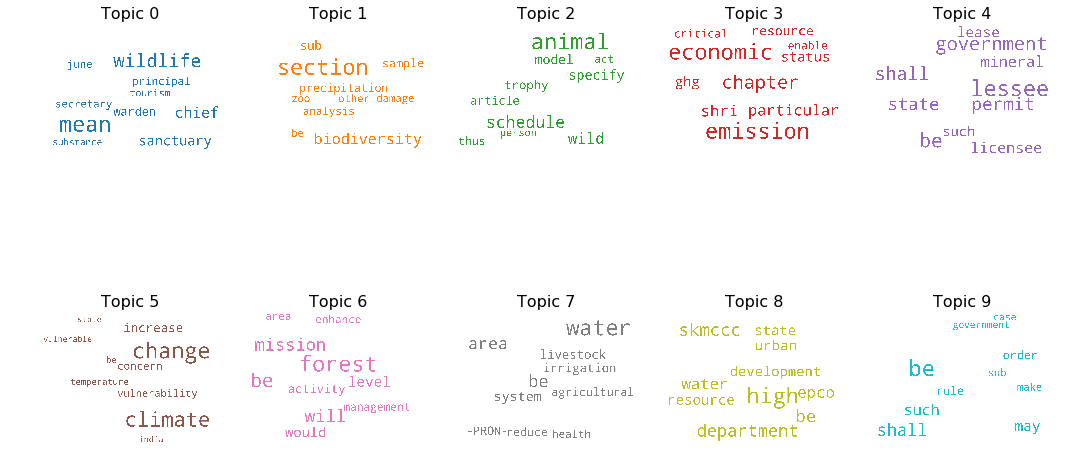

In [24]:
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 5, figsize=(15,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# Storage